# Evaluating Storm Surge Risk

In this notebook you will explore the risk to different countries around the world caused by sea level rise and increasing storms.

We will be plotting our data using matplotlib, so import that library with its alias:

In [2]:
import matplotlib.pyplot as plt

## Exploring the data
Look on Slack for your region and copy and paste the list of data into the cell below (remember to assign it to a variable):

Note: Your data is a list of lists. Each list contains the following values for the countries in your region with the largest percentage of urban inhabitants:
- Country name
- Latitude
- Longitude
- Population (2008)
- Population in storm surge area (2008)

In [3]:
regionList = [["Guam", 13.444304, 144.793731, 175990, 3920], ["American Samoa", -14.270972, -170.132217, 64830, 1410],
        ["Iceland", 64.963051, -19.020835, 304370, 19460], ["Northern Mariana Islands", 17.33083, 145.38469, 55240, 3030],
        ["Australia", -25.274398, 133.775136, 21007310, 852720], ["New Zealand", -40.900557, 174.885971, 4173460, 210900],
        ["Greenland", 71.706936, -42.604303, 57560, 13610], ["Palau", 7.51498, 134.58252, 20700, 790],
        ["Marshall Islands", 7.131474, 171.184478, 63170, 9700], ["Svalbard and Jan Mayen", 77.553604, 23.670272, 2160, 220]]

Let's practice using list indexes. Print out the first list from your data:

In [4]:
print(regionList[0])

['Guam', 13.444304, 144.793731, 175990, 3920]


Now, print out just the latitude from that list:

In [6]:
# Hint: If one of the values in a list is a list itself, you can index it like this: my_list[0][0]
print(regionList[0][1])


13.444304


You can select more than one value from a list using a "slice". 

For example, [0] selects just the first value and [1] selects just the second value, but [0:2] selects values one and two. 

Note: you need to slice from the first value you want to **the last value you want +1**

Try it yourself! Print out the latitude and longitude from the first item in your list using a slice:

In [12]:
print(regionList[1:2])

[['American Samoa', -14.270972, -170.132217, 64830, 1410]]


## Assessing risk

Let's find out which countries in your region are at the highest risk. 

First, write code that loops through each list in your data and prints out the population in the storm surge area:

In [13]:
for i in regionList:
    print(i[4])

3920
1410
19460
3030
852720
210900
13610
790
9700
220


Now write code that prints the percent of the population in each country that lives in the storm surge area:
Note: percent = subset/total * 100

In [16]:
# For a challenge, try including the name of the country in your print statement
for i in regionList:
    print(i[0])
    print(i[4]/i[3]*100)

Guam
2.22739928405023
American Samoa
2.1749190189726977
Iceland
6.393534185366495
Northern Mariana Islands
5.485155684286749
Australia
4.059158454842623
New Zealand
5.053361000225233
Greenland
23.644892286309936
Palau
3.816425120772947
Marshall Islands
15.355390216875097
Svalbard and Jan Mayen
10.185185185185185


## Mapping the data

Let's put these countries on the map! We're going to plot each country on a map of your region, which means we need to create lists of the latitude and longitudes. To represent the risk each country faces from sea level rise, let's create three sets of lists:
- Low risk (% pop in storm surge area <=5)
- Medium risk (% pop in storm surge area >5 and <10)
- Low risk (% pop in storm surge area >=10)

Write code below that creates fills in 6 lists: lat_low, lon_low, lat_med, lon_med, lat_high, lon_high:

In [29]:
lat_low = []
lat_med = []
lat_high = []
lon_low = []
lon_med = []
lon_high = []

for i in regionList: 
    per =(i[4]/i[3])*100
    if per <= 5:
        lat_low.append(i[1])
        lon_low.append(i[2])
    elif 5 < per < 10:
        lat_med.append(i[1])
        lon_med.append(i[2])
    elif per >= 10:
        lat_high.append(i[1])
        lon_high.append(i[2])
        

Print out your lat and lon lists to check that they contain the right values:

In [30]:
print(lat_low,lat_med,lat_high,lon_low, lon_med,lon_high)

[13.444304, -14.270972, -25.274398, 7.51498] [64.963051, 17.33083, -40.900557] [71.706936, 7.131474, 77.553604] [144.793731, -170.132217, 133.775136, 134.58252] [-19.020835, 145.38469, 174.885971] [-42.604303, 171.184478, 23.670272]


We will reuse code from the Earthquakes final project here. 

Remember to replace the coordinates in plt.xlim and plt.ylim functions below as follows:
- Africa: x = (-25,50), y = (-40,45)
- Asia: x = (30,150), y = (5,55)
- Europe: x = (-10,30), y = (35,70)
- Latin & South America: x = (-90,-35), y = (-55,35)
- Oceania: x = (-180,180), y = (-60,85)

You will also have to create your own plt.scatter() plots. You will need to use the plt.scatter() function three times: once for each set of lists you created above. 

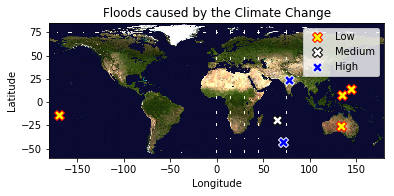

In [48]:
# This code adds an image behind your plot
image = plt.imread("earth.jpg")
fig, ax = plt.subplots()
ax.imshow(image, extent = [-180,180,-90,90])

# This code crops the image to show only your region. 
# IMPORTANT: Replace the coordinates in plt.xlim and plt.ylim functions
# To match your region using the key above
plt.xlim (-180,180)
plt.ylim(-60,85)

# Create three scatter plots using plt.scatter(). 
# You can change the size, shape, and color of your markers! 
# example: plt.scatter(lon_low, lat_low, s = 35, marker = "o", c = "yellow", edgecolors="black")
plt.scatter(lon_low, lat_low, s = 100, marker = "X", c = "yellow", edgecolors="red", label = "Low" )
plt.scatter(lat_med, lon_med, s = 100, marker = "X", c = "white" , edgecolors = "black", label = "Medium" )
plt.scatter(lat_high, lon_high, s = 100, marker = "X", c = "blue", edgecolors = "white", label = "High")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Floods caused by the Climate Change")
# don't forget plt.show()!
plt.legend()
plt.show()